In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import numpy as np

sns.set(style="whitegrid")


In [ ]:
DETECTION_CSV = r"C:\Users\Aneek\Desktop\LIC\Licplatesdetection_train.csv"
RECOGNITION_CSV = r"C:\Users\Aneek\Desktop\LIC\Licplatesrecognition_train.csv"
DETECTION_DATA_DIR = r"C:\Users\Aneek\Desktop\LIC\Licplatesdetection_train"
RECOGNITION_DATA_DIR = r"C:\Users\Aneek\Desktop\LIC\Licplatesrecognition_train"

detect_df = pd.read_csv(DETECTION_CSV)
print("Detection Dataset Shape:", detect_df.shape)
print(detect_df.head())

recog_df = pd.read_csv(RECOGNITION_CSV)
print("Recognition Dataset Shape:", recog_df.shape)
print(recog_df.head())


Detection Dataset Shape: (900, 5)
    img_id  ymin  xmin  ymax  xmax
0    1.jpg   276    94   326   169
1   10.jpg   311   395   344   444
2  100.jpg   406   263   450   434
3  101.jpg   283   363   315   494
4  102.jpg   139    42   280   222
Recognition Dataset Shape: (900, 2)
    img_id      text
0    0.jpg  117T3989
1    1.jpg  128T8086
2   10.jpg   94T3458
3  100.jpg  133T6719
4  101.jpg   68T5979


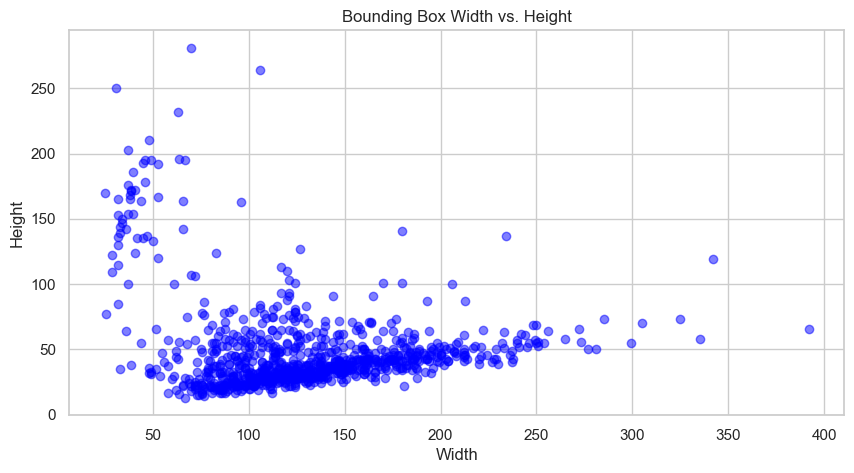

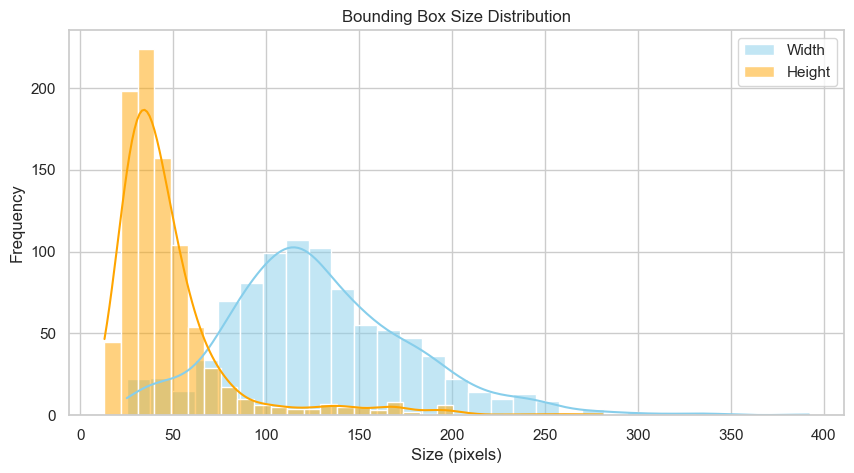

In [ ]:
detect_df['box_width'] = detect_df['xmax'] - detect_df['xmin']
detect_df['box_height'] = detect_df['ymax'] - detect_df['ymin']

plt.figure(figsize=(10, 5))
plt.scatter(detect_df['box_width'], detect_df['box_height'], alpha=0.5, color='blue')
plt.title("Bounding Box Width vs. Height")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(detect_df['box_width'], bins=30, kde=True, color='skyblue', label="Width")
sns.histplot(detect_df['box_height'], bins=30, kde=True, color='orange', label="Height")
plt.title("Bounding Box Size Distribution")
plt.xlabel("Size (pixels)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


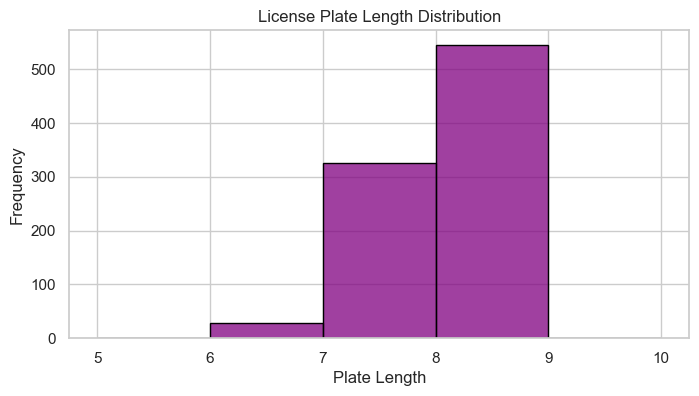

C:\Users\Aneek\AppData\Local\Temp\ipykernel_15280\2088863844.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(char_freq.keys()), y=list(char_freq.values()), palette="viridis")


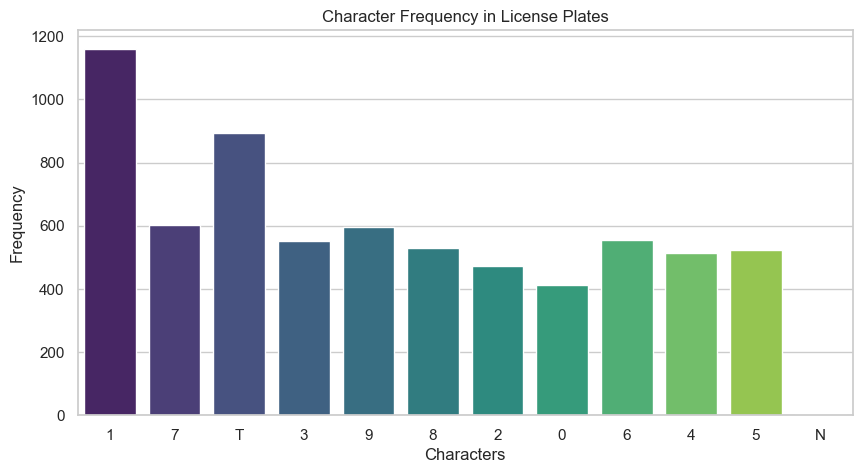

In [ ]:
recog_df['plate_length'] = recog_df['text'].apply(lambda x: len(str(x).strip()))

plt.figure(figsize=(8, 4))
sns.histplot(recog_df['plate_length'], bins=range(5, 11), color='purple', edgecolor='black')
plt.title("License Plate Length Distribution")
plt.xlabel("Plate Length")
plt.ylabel("Frequency")
plt.xticks(range(5, 11))
plt.show()

from collections import Counter
all_chars = "".join(recog_df['text'])
char_freq = Counter(all_chars)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(char_freq.keys()), y=list(char_freq.values()), palette="viridis")
plt.title("Character Frequency in License Plates")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()


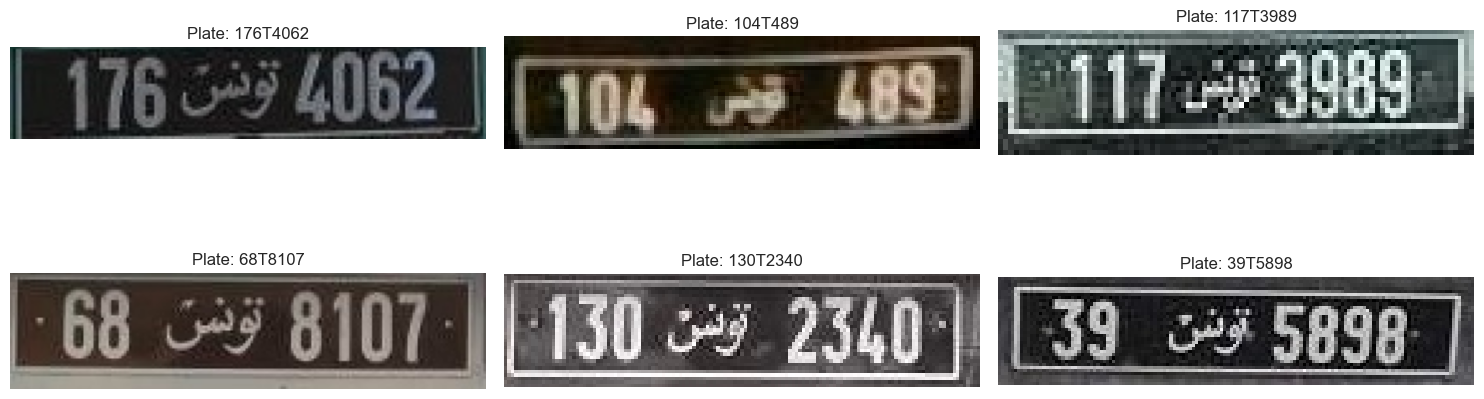

In [ ]:
def show_images(img_dir, df, num_images=6):
    fig, axes = plt.subplots(2, num_images//2, figsize=(15, 6))
    sample_rows = df.sample(num_images).reset_index()
    
    for i, row in sample_rows.iterrows():
        img_path = os.path.join(img_dir, row['img_id'])
        image = Image.open(img_path)
        axes[i//3, i%3].imshow(image, cmap='gray')
        axes[i//3, i%3].set_title(f"Plate: {row['text']}")
        axes[i//3, i%3].axis('off')
    
    plt.tight_layout()
    plt.show()

show_images(RECOGNITION_DATA_DIR, recog_df, num_images=6)
